### This notebook is to analyse how the model learns

In [1]:

from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad, LayerCAM, EigenGradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image
from pytorch_grad_cam import GuidedBackpropReLUModel
from torchvision.models import resnet50
import argparse
import torch
import cv2
import numpy as np
import torchvision.transforms as T
import torch.nn as nn
from matplotlib import pyplot

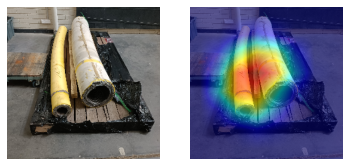

Predicted label:  Not damaged
True label:  Not damaged


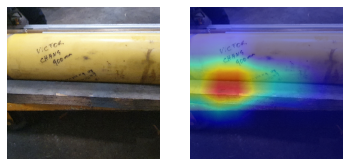

Predicted label:  Not damaged
True label:  Not damaged


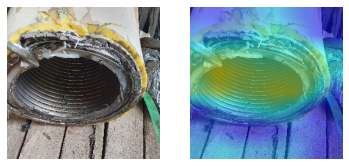

Predicted label:  Externally Damaged
True label:  Not damaged


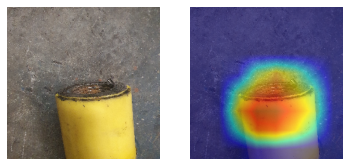

Predicted label:  Not damaged
True label:  Not damaged


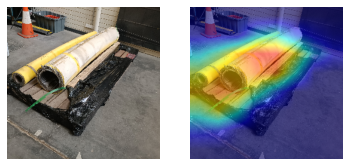

Predicted label:  Not damaged
True label:  Not damaged


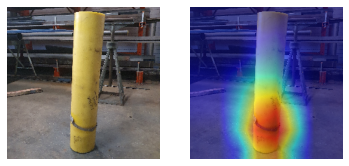

Predicted label:  Not damaged
True label:  Not damaged


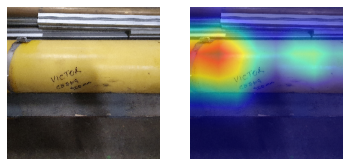

Predicted label:  Not damaged
True label:  Not damaged


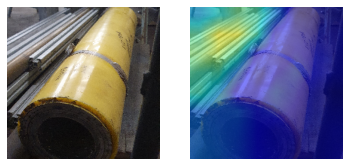

Predicted label:  Not damaged
True label:  Not damaged


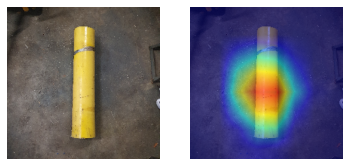

Predicted label:  Not damaged
True label:  Not damaged


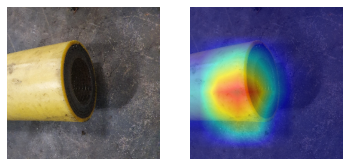

Predicted label:  Not damaged
True label:  Not damaged


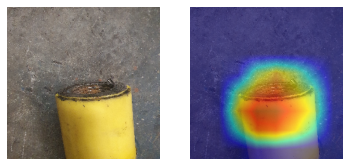

Predicted label:  Not damaged
True label:  Not damaged


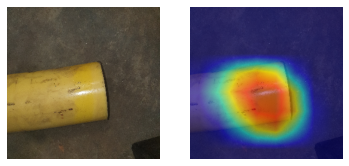

Predicted label:  Not damaged
True label:  Not damaged


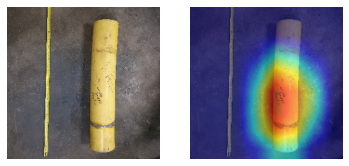

Predicted label:  Not damaged
True label:  Not damaged


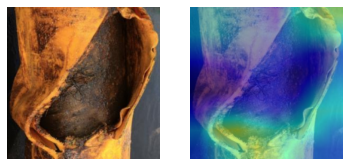

Predicted label:  Externally Damaged
True label:  Externally Damaged


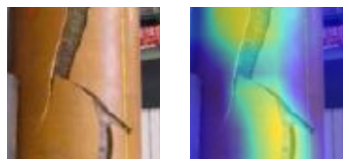

Predicted label:  Externally Damaged
True label:  Externally Damaged


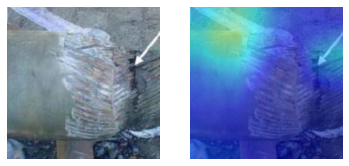

Predicted label:  Externally Damaged
True label:  Externally Damaged


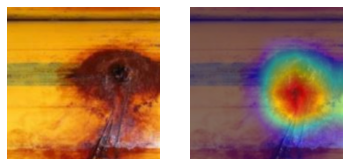

Predicted label:  Externally Damaged
True label:  Externally Damaged


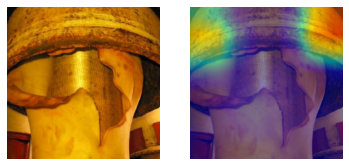

Predicted label:  Externally Damaged
True label:  Externally Damaged


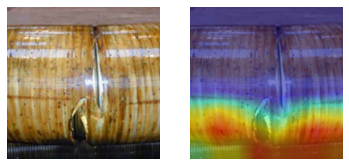

Predicted label:  Externally Damaged
True label:  Externally Damaged


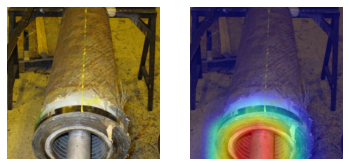

Predicted label:  Externally Damaged
True label:  Externally Damaged


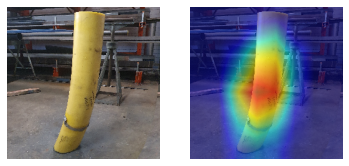

Predicted label:  Externally Damaged
True label:  Externally Damaged


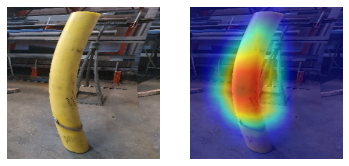

Predicted label:  Externally Damaged
True label:  Externally Damaged


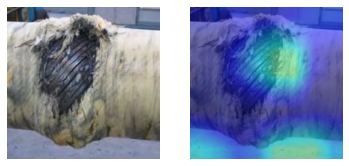

Predicted label:  Externally Damaged
True label:  Externally Damaged


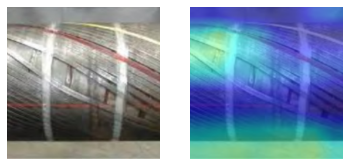

Predicted label:  Externally Damaged
True label:  Externally Damaged


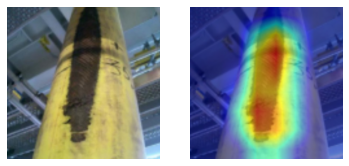

Predicted label:  Not damaged
True label:  Externally Damaged


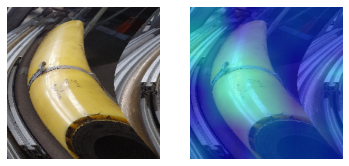

Predicted label:  Externally Damaged
True label:  Externally Damaged


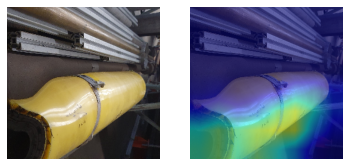

Predicted label:  Externally Damaged
True label:  Externally Damaged


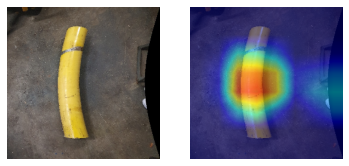

Predicted label:  Externally Damaged
True label:  Externally Damaged


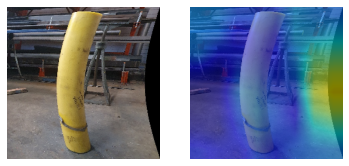

Predicted label:  Externally Damaged
True label:  Externally Damaged


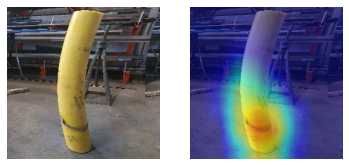

Predicted label:  Externally Damaged
True label:  Externally Damaged


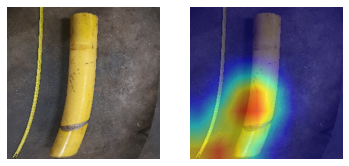

Predicted label:  Externally Damaged
True label:  Externally Damaged


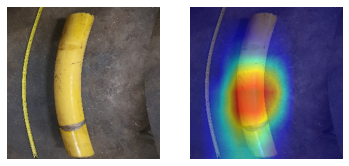

Predicted label:  Externally Damaged
True label:  Externally Damaged


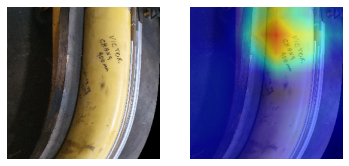

Predicted label:  Externally Damaged
True label:  Externally Damaged


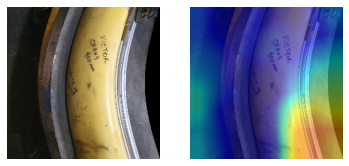

Predicted label:  Externally Damaged
True label:  Externally Damaged


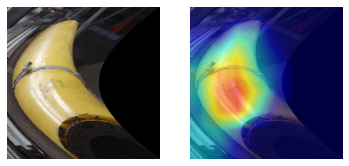

Predicted label:  Externally Damaged
True label:  Externally Damaged


In [2]:
#Set device to GPU_indx if GPU is avaliable
GPU_indx = 0
device = torch.device(GPU_indx if torch.cuda.is_available() else 'cpu')

label_map = {
    "0": "Not damaged",
    "1": "Externally Damaged"
}


model_external = resnet50(pretrained=True)
num_ftrs = model_external.fc.in_features
model_external.fc = nn.Linear(num_ftrs, 2)
model_external = model_external.to(device)

check_point_external = torch.load("Models/ResNet50_External.pt")
model_external.load_state_dict(check_point_external['model_state_dict'])

target_layers = [model_external.layer4[-1]]


# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model_external, target_layers=target_layers, use_cuda=True)

data = np.load('Models/external.npz')
test_images = data['test_imgs']
test_labels = data['test_labels']

for i in range(len(test_images)):
    # Get image
    img = test_images[i]
    img_tensor = torch.unsqueeze(torch.moveaxis(torch.from_numpy(img), 2,0), dim=0).to(device)

    # Get model prediction
    output = model_external(img_tensor)
    predicted_label = np.argmax(output.cpu().detach().numpy(), 1)[0]
    true_label = test_labels[i]

    # Get Class Activation Mapping
    # Use the highest scoring class
    targets = None

    # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
    grayscale_cam = cam(input_tensor=img_tensor, targets=targets, eigen_smooth=True, aug_smooth=True)

    # In this example grayscale_cam has only one image in the batch:
    grayscale_cam = grayscale_cam[0, :]
    img_cam = show_cam_on_image(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), grayscale_cam, use_rgb=True)

    # Show images
    pyplot.subplot(1,2, 1)
    pyplot.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    pyplot.axis("off")
    pyplot.subplot(1,2, 2)
    pyplot.imshow(img_cam)
    pyplot.axis("off")
    pyplot.show()
    print('Predicted label: ', label_map[str(predicted_label)])
    print('True label: ', label_map[str(true_label)])



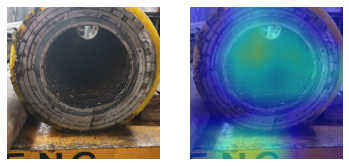

Predicted label:  Internally Damaged
True label:  Not damaged


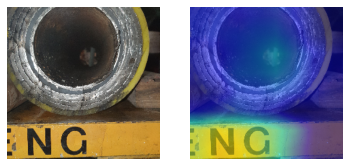

Predicted label:  Internally Damaged
True label:  Not damaged


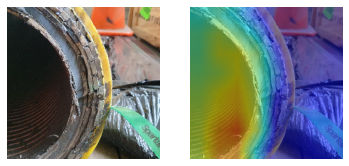

Predicted label:  Internally Damaged
True label:  Not damaged


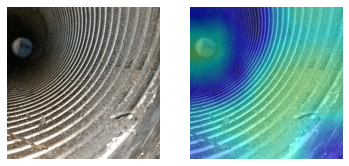

Predicted label:  Internally Damaged
True label:  Not damaged


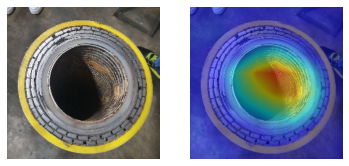

Predicted label:  Internally Damaged
True label:  Not damaged


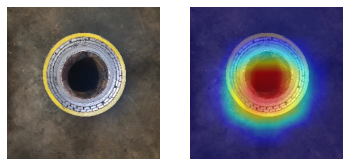

Predicted label:  Internally Damaged
True label:  Not damaged


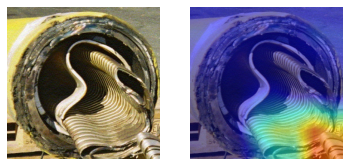

Predicted label:  Internally Damaged
True label:  Internally Damaged


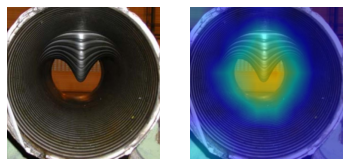

Predicted label:  Internally Damaged
True label:  Internally Damaged


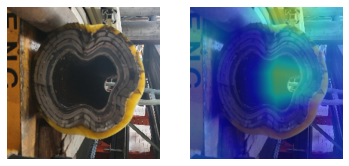

Predicted label:  Internally Damaged
True label:  Internally Damaged


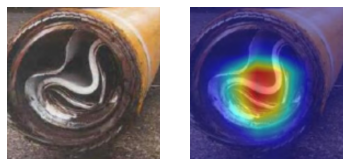

Predicted label:  Internally Damaged
True label:  Internally Damaged


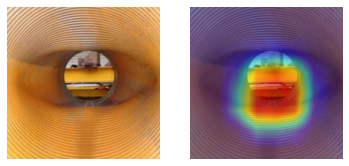

Predicted label:  Internally Damaged
True label:  Internally Damaged


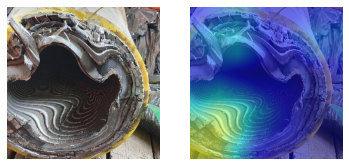

Predicted label:  Internally Damaged
True label:  Internally Damaged


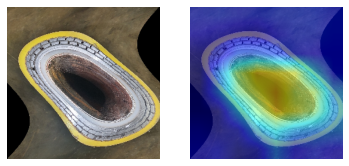

Predicted label:  Internally Damaged
True label:  Internally Damaged


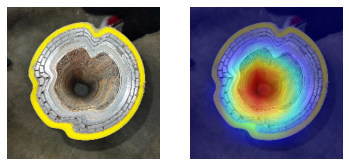

Predicted label:  Internally Damaged
True label:  Internally Damaged


In [3]:
label_map = {
    "0": "Not damaged",
    "1": "Internally Damaged"
}

model_internal = resnet50(pretrained=True)
num_ftrs = model_internal.fc.in_features
model_internal.fc = nn.Linear(num_ftrs, 2)
model_internal = model_internal.to(device)

check_point_internal = torch.load("Models/ResNet50_Internal.pt")
model_internal.load_state_dict(check_point_internal['model_state_dict'])

target_layers = [model_internal.layer4[-1]]


# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model_internal, target_layers=target_layers, use_cuda=True)

data = np.load('Models/internal.npz')
test_images = data['test_imgs']
test_labels = data['test_labels']

for i in range(len(test_images)):
    # Get image
    img = test_images[i]
    img_tensor = torch.unsqueeze(torch.moveaxis(torch.from_numpy(img), 2,0), dim=0).to(device)

    # Get model prediction
    output = model_external(img_tensor)
    predicted_label = np.argmax(output.cpu().detach().numpy(), 1)[0]
    true_label = test_labels[i]

    # Get Class Activation Mapping
    # Use the highest scoring class
    targets = None

    # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
    grayscale_cam = cam(input_tensor=img_tensor, targets=targets, eigen_smooth=True, aug_smooth=True)

    # In this example grayscale_cam has only one image in the batch:
    grayscale_cam = grayscale_cam[0, :]
    img_cam = show_cam_on_image(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), grayscale_cam, use_rgb=True)

    # Show images
    pyplot.subplot(1,2, 1)
    pyplot.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    pyplot.axis("off")
    pyplot.subplot(1,2, 2)
    pyplot.imshow(img_cam)
    pyplot.axis("off")
    pyplot.show()
    print('Predicted label: ', label_map[str(predicted_label)])
    print('True label: ', label_map[str(true_label)])


In [4]:
label_map = {
    "0": "Not damaged",
    "1": "Externally Damaged",
    "2": "Internally Damaged"
}

model_both = resnet50(pretrained=True)
num_ftrs = model_both.fc.in_features
model_both.fc = nn.Linear(num_ftrs, 3)
model_both = model_both.to(device)

check_point_both = torch.load("Models/ResNet50_Both.pt")
model_both.load_state_dict(check_point_both['model_state_dict'])

target_layers = [model_both.layer4[-1]]


# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model_both, target_layers=target_layers, use_cuda=True)

data = np.load('Models/both.npz')
test_images = data['test_imgs']
test_labels = data['test_labels']

for i in range(len(test_images)):
    # Get image
    img = test_images[i]
    img_tensor = torch.unsqueeze(torch.moveaxis(torch.from_numpy(img), 2,0), dim=0).to(device)

    # Get model prediction
    output = model_external(img_tensor)
    predicted_label = np.argmax(output.cpu().detach().numpy(), 1)[0]
    true_label = test_labels[i]

    # Get Class Activation Mapping
    # Use the highest scoring class
    targets = None

    # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
    grayscale_cam = cam(input_tensor=img_tensor, targets=targets, eigen_smooth=True, aug_smooth=True)

    # In this example grayscale_cam has only one image in the batch:
    grayscale_cam = grayscale_cam[0, :]
    img_cam = show_cam_on_image(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), grayscale_cam, use_rgb=True)

    # Show images
    pyplot.subplot(1,2, 1)
    pyplot.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    pyplot.axis("off")
    pyplot.subplot(1,2, 2)
    pyplot.imshow(img_cam)
    pyplot.axis("off")
    pyplot.show()
    print('Predicted label: ', label_map[str(predicted_label)])
    print('True label: ', label_map[str(true_label)])


FileNotFoundError: [Errno 2] No such file or directory: 'Models/ResNet50_Both.pt'